In [1]:
%load_ext autoreload
%autoreload 2

import radon
import torch

_avail_gpus = torch.cuda.device_count()
GPU_ID = 2  # Default GPU ID
if _avail_gpus == 0:
    print("No GPUs available -- will need one for cuda")
    device = "cpu"
else:
    print(f"Available GPUs: {_avail_gpus}")
    print(f"Using GPU ID {GPU_ID} : {torch.cuda.get_device_name(GPU_ID)}")
    torch.cuda.set_device(GPU_ID)
    device = f"cuda:{GPU_ID}"

CUDA backend loaded successfully.
RaysCfg loaded successfully.
Available GPUs: 4
Using GPU ID 2 : NVIDIA L40S


In [2]:
a = torch.rand(3, device=GPU_ID)
b = torch.rand(3, device=GPU_ID)
c = torch.zeros_like(a, device=GPU_ID)
radon.add_arrays(a, b, c)
print("Result:", c)

Result: Hello from CUDA thread 0: 0.07 + 0.83 = 0.90
Hello from CUDA thread 1: 0.23 + 0.42 = 0.65
Hello from CUDA thread 2: 0.63 + 0.69 = 1.32
tensor([0.9024, 0.6453, 1.3229], device='cuda:2')


In [3]:
r = radon.Radon(1,[0,10,20,30])
print("Radon object created:", r)
print("Radon version:", r.version)
print("Radon working successfully on device")
print("RaysCfg object:", r.rays_cfg)
print("TextureCache object:", r.tex_cache)

Radon object created: <radon.radon.Radon object at 0x75d1af9f4e60>
Radon version: 0.1.0
Radon working successfully on device
RaysCfg object: <radon.cuda._cuda_add.RaysCfg object at 0x75d1af968db0>
TextureCache object: <radon.cuda._cuda_add.TextureCache object at 0x75d35ad7e1f0>


In [4]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 7]
import numpy as np

In [5]:
# define some constants
batch_size = 1
n_angles = 512

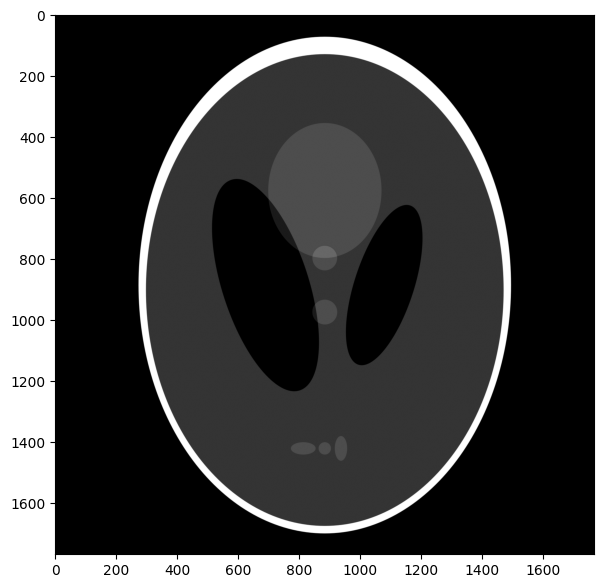

In [10]:
from PIL import Image

image_path = 'SheppLogan_Phantom.png'
image = Image.open(image_path)

# Convert to grayscale
grayscale_image = image.convert('L')

# Convert grayscale image to a 2D NumPy array
img = np.array(grayscale_image)

image_size = img.shape[0]
x = torch.FloatTensor(img).to(device)

_ = plt.imshow(img, cmap="gray") 

2502


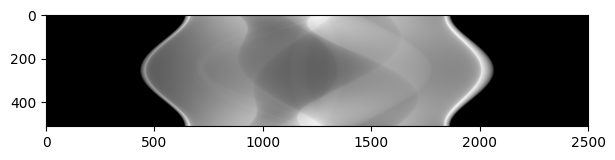

In [11]:
# define measuring angles
angles = np.linspace(0, np.pi, n_angles, endpoint=False)

det_count = int(np.sqrt(2)*image_size + 0.5)
print(det_count)

# instantiate Radon transform
radon = radon.Radon(image_size, angles, clip_to_circle=False, det_count=det_count)

sinogram = radon.forward(x)
_ = plt.imshow(sinogram.cpu(), cmap="gray") 

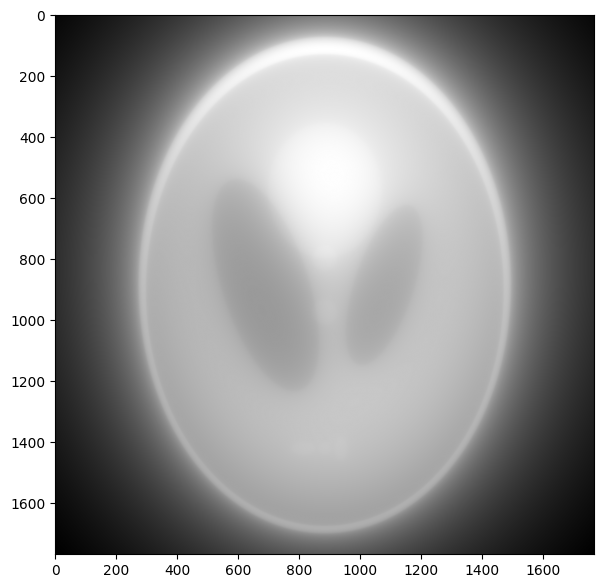

In [12]:
bp = radon.backprojection(sinogram)
_ = plt.imshow(bp.cpu(), cmap="gray") 